In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Input,Flatten,Conv2D,MaxPooling2D,concatenate
from tensorflow.keras.activations import relu
from tensorflow.keras.utils import plot_model

In [2]:
import os
os.chdir('c:\\Users\\ASUS\\Projects')

In [8]:
df = pd.read_csv('CI\\Asia_ImportQuantity.csv',encoding='latin-1')

In [9]:
df = df.set_index('Year')

In [10]:
X = df[(df['Area']=='Turkey')&(df['Item']=='Urea')]
X = X.drop(['Area','Item'],axis=1)
X

,Value
Year,
2002,648210.55
2003,696935.73
2004,942173.25
2005,808284.41
2006,1104413.38
2007,1291451.42
2008,1210530.11
2009,1411028.57
2010,1285766.23


In [11]:
df['Item'].value_counts()

Other nitrogenous fertilizers, n.e.c.                                       673
Fertilizers n.e.c.                                                          656
NPK fertilizers                                                             648
Urea                                                                        645
Ammonium sulphate                                                           614
Potassium chloride (muriate of potash) (MOP)                                611
Ammonium nitrate (AN)                                                       591
Potassium nitrate                                                           585
Other NP compounds                                                          579
Potassium sulphate (sulphate of potash) (SOP)                               563
Sodium nitrate                                                              539
Ammonia, anhydrous                                                          539
Other potassic fertilizers, n.e.c.      

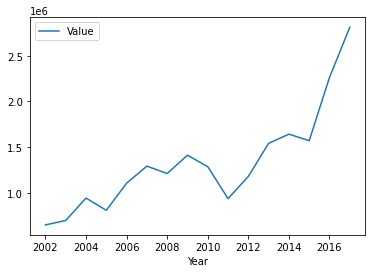

In [12]:
X.plot()

In [13]:
len(X)

16

In [15]:
x_train = X.iloc[:13]
X_test = X.iloc[13:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(X_test)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(x_train_scaled, x_train_scaled, length=n_input, batch_size=1)

In [27]:
model = Sequential()
model.add(Dense(units=13,activation='relu', input_shape=(n_input, n_features)))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [28]:
model.fit_generator(generator,epochs=30)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
11/11 [==============================] - 1s 3ms/step - loss: 0.2886
Epoch 2/30
11/11 [==============================] - 0s 2ms/step - loss: 0.1212
Epoch 3/30
11/11 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 4/30
11/11 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 5/30
11/11 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 6/30
11/11 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 7/30
11/11 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 8/30
11/11 [================

In [22]:
#model.fit(X, y, epochs=1000, verbose=0)
#model.predict(x_input, verbose=0)
#model.history.history.keys()

dict_keys(['loss'])

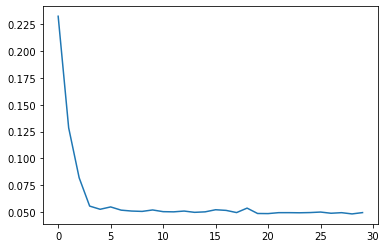

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [42]:
first_eval_batch = x_train_scaled[-12:]
#first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
#model.predict(first_eval_batch)

In [24]:
test_predictions = []

first_eval_batch = x_train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(X_test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)